In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## OUTLINE

- Sales by Segment
- Order by Month
- Total Category Growth by Year
- Total Segment Growth by Year

Tambahan:
- Descriptive Analytics
- Categorical Variable Analysis (PMF)
- Hypothesis Testing

In [2]:
df_budget = pd.read_csv('Budget.csv')
df_detail = pd.read_csv('Details.csv')
df_order = pd.read_csv('Orders.csv')

In [3]:
order_details = pd.merge(
    df_detail, df_order, how='left', on='Order ID'
)

order_details

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City
0,B-25681,1096,658,7,Female,Sports Watch,COD,04/06/2022,Bhawna,Madhya Pradesh,Indore
1,B-26055,5729,64,14,Unisex,Luxury Watch,EMI,10/03/2023,Harivansh,Uttar Pradesh,Mathura
2,B-25955,2927,146,8,Unisex,Digital Watch,EMI,16/01/2022,Shiva,Maharashtra,Pune
3,B-26093,2847,712,8,Female,Military Watch,Credit Card,27/03/2022,Sarita,Maharashtra,Pune
4,B-25602,2617,1151,4,Female,Pilot Watch,Credit Card,01/04/2022,Vrinda,Maharashtra,Pune
...,...,...,...,...,...,...,...,...,...,...,...
1575,A-24003,7,-3,2,Male,Dress Watch,COD,19/03/2023,Nikhil,Punjab,Chandigarh
1576,A-24004,3151,-35,7,Male,Quartz Watch,EMI,01/05/2023,Shikhar,Himachal Pradesh,Simla
1577,A-24005,4141,1698,13,Female,Military Watch,COD,02/06/2023,Surabhi,Tamil Nadu,Chennai
1578,A-24006,7,-2,1,Male,Dress Watch,COD,23/08/2023,Rane,Maharashtra,Mumbai


In [4]:
order_details = order_details.dropna(how='any',axis=0)

### Extract Year

In [5]:
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'].str.strip(), format='%d/%m/%Y')
order_details['Year'] = order_details['Order Date'].dt.year.astype(int)
order_details['Year'] = order_details['Year'].apply(str)

order_details.head()

<ipython-input-5-3f614abf5755>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_details['Order Date'] = pd.to_datetime(order_details['Order Date'].str.strip(), format='%d/%m/%Y')
<ipython-input-5-3f614abf5755>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_details['Year'] = order_details['Order Date'].dt.year.astype(int)
<ipython-input-5-3f614abf5755>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year
0,B-25681,1096,658,7,Female,Sports Watch,COD,2022-06-04,Bhawna,Madhya Pradesh,Indore,2022
1,B-26055,5729,64,14,Unisex,Luxury Watch,EMI,2023-03-10,Harivansh,Uttar Pradesh,Mathura,2023
2,B-25955,2927,146,8,Unisex,Digital Watch,EMI,2022-01-16,Shiva,Maharashtra,Pune,2022
3,B-26093,2847,712,8,Female,Military Watch,Credit Card,2022-03-27,Sarita,Maharashtra,Pune,2022
4,B-25602,2617,1151,4,Female,Pilot Watch,Credit Card,2022-04-01,Vrinda,Maharashtra,Pune,2022


In [6]:
order_details['Month Idx'] = order_details['Order Date'].dt.month
order_details['Month'] = order_details['Order Date'].dt.strftime('%b')

<ipython-input-6-2c2bcd685265>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_details['Month Idx'] = order_details['Order Date'].dt.month
<ipython-input-6-2c2bcd685265>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_details['Month'] = order_details['Order Date'].dt.strftime('%b')


## Sales by Segment

Karena tidak pendefinisian secara khusus kolom mana yang menjadi segmen dan sales, maka di analisis ditentukan sebagai berikut:
- Segment -> berdasarkan State
- Sales -> berdasarkan Amount

Misal untuk segment di State Madhya Pradesh adalah sebagai berikut.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


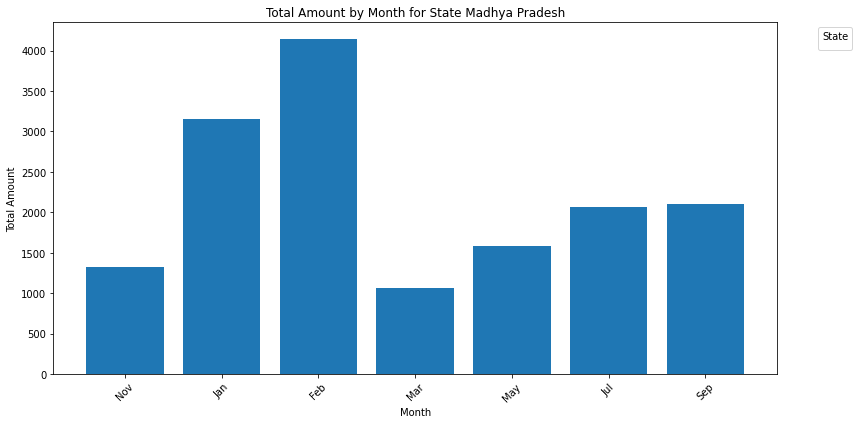

In [7]:
sales_by_month_delhi = order_details[order_details['State'] == 'Madhya Pradesh'][['Year', 'Amount', 'Month']]

plt.figure(figsize=(12, 6))

plt.bar(sales_by_month_delhi[sales_by_month_delhi['Year'] == '2023']['Month'], sales_by_month_delhi[sales_by_month_delhi['Year'] == '2023']['Amount'])

plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.title('Total Amount by Month for State Madhya Pradesh')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Order by Month

In [8]:
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May',
             6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 
             11:'Nov', 12:'Dec'}

monthly_quantity = order_details[order_details['Year'] == '2023'].groupby('Month Idx')['Quantity'].sum()
monthly_quantity = monthly_quantity.sort_index()
# mapping month idx ke value yang ada di var month_map
monthly_quantity.index = monthly_quantity.index.map(month_map)

monthly_quantity = pd.DataFrame(monthly_quantity)

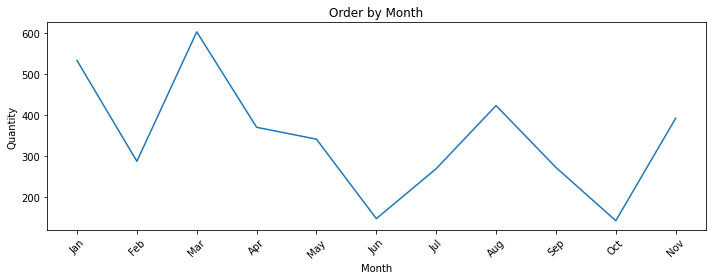

In [9]:
plt.figure(figsize=(10, 4))

plt.plot(monthly_quantity.index, monthly_quantity['Quantity'])

plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Order by Month')
# plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Total Category Growth by Year

Dalam data ini tidak begitu jelas apakah category yang dimaksud pada table Budget atau table Detail. Dalam analisis ini digunakan category pada table Detail yang lebih mengara kepada jenis kelamin

In [10]:
growth_year = order_details.loc[:, ['Year', 'Amount', 'Category']]
order_details.groupby(['Year', 'Category'])['Amount'].sum().unstack().pct_change() * 100

Category,Female,Male,Unisex
Year,,,
2022,NaN,NaN,NaN
2023,17.908497,66.692601,56.220778


Untuk mengetahui avg growthnya seperti berikut:

In [11]:
grouped = order_details.groupby(['Category', 'Year'])
total_sales = grouped['Amount'].sum()

category_growth = total_sales.unstack().pct_change(axis=1)
category_growth['2023'].mean()

0.4694062513986104

Total growth untuk category pada tahun 2023 meningkat sebesar 46.9%

## Total Segment Growth by Year

Dalam data ini tidak begitu jelas apakah segment yang dimaksud, karena tidak ada kolom khusus yang menjelaskan terkait segment. Sehingga dalam analisis ini digunakan segment berdasarkan State

In [12]:
grouped_segment = order_details.groupby(['State', 'Year'])

# Langkah 2: Hitung total penjualan untuk setiap kelompok
total_sales_segment = grouped_segment['Amount'].sum()

# Langkah 3: Hitung pertumbuhan kategori dari tahun ke tahun
segment_category_growth = total_sales_segment.unstack().pct_change(axis=1)

print(segment_category_growth)

Year               2022      2023
State                            
Andhra Pradesh      NaN  0.000000
Bihar               NaN  0.000000
Delhi               NaN  0.671804
Goa                 NaN  2.726681
Gujarat             NaN  1.923665
Haryana             NaN  0.000000
Himachal Pradesh    NaN  1.583429
Jammu and Kashmir   NaN  1.686316
Karnataka           NaN  0.000000
Kerala              NaN  0.000000
Madhya Pradesh      NaN  1.514657
Maharashtra         NaN -0.274971
Nagaland            NaN  1.309550
Punjab              NaN  0.168204
Rajasthan           NaN -0.153675
Sikkim              NaN  5.121301
Tamil Nadu          NaN  3.019681
Uttar Pradesh       NaN -0.631747
West Bengal         NaN  0.254453


In [13]:
segment_category_growth['2023'].mean()

0.9957551911869512

Total growth segmment pada tahun 2023 meningkat sebesar 99.5%

## Descriptive Statistic Analysis

### Rata-rata pembelian produk dalam satu transaksi

In [14]:
order_details.groupby('Order ID')['Quantity'].sum().mean()

10.239655172413793

### Rata-rata profit yang dihasilkan dalam satu transaksi

In [15]:
order_details.groupby('Order ID')['Profit'].sum().mean()

79.11206896551724

### Apakah rata-rata nilai transaksi perempuan dan laki-laki sama?

In [16]:
selected_categories = ['Female', 'Male']

avg_amount_by_sex = order_details[
    order_details['Category'].isin(selected_categories)
    ].groupby('Category')['Amount'].mean()

print(avg_amount_by_sex)

Category
Female    586.537037
Male      161.270270
Name: Amount, dtype: float64


In [17]:
avg_amount_by_sex['Female'] / avg_amount_by_sex['Male']

3.636981794933865

Nilai transaksi perempuan 3.6 kali lipat lebih besar dari nilai rata-rata transaksi laki-laki

### Avg Purchase Value

In [18]:
(order_details['Amount'] * order_details['Quantity']).sum() / order_details['Quantity'].sum()

441.2845596901835

### Total Profit 2023

In [19]:
profit_current_year = order_details[order_details['Year'] == '2023']['Profit'].sum()
print('Profit tahun 2023 adalah', profit_current_year)

Profit tahun 2023 adalah 27222


In [23]:
profit_previous_year = order_details[order_details['Year'] == '2022']['Profit'].sum()

print("Growth profit tahun 2023 adalah", ((profit_current_year - profit_previous_year) / profit_previous_year) * 100,"%") 

Growth profit tahun 2023 adalah 45.860794084552325 %


## Categorical Variabel Analysis (PMF)

### Distribusi proporsi profit di tiap-tiap state

In [24]:
pd.DataFrame(
    order_details.groupby('State')['Profit'].sum() / order_details['Profit'].sum()
    ).sort_values(
        by='Profit',ascending=False
        ).head()

,Profit
State,
Madhya Pradesh,0.247990
Maharashtra,0.161839
Gujarat,0.150311
Punjab,0.095652
Tamil Nadu,0.068127


### Distribusi nilai transaksi berdasarkan State yang memiliki profit paling tinggi

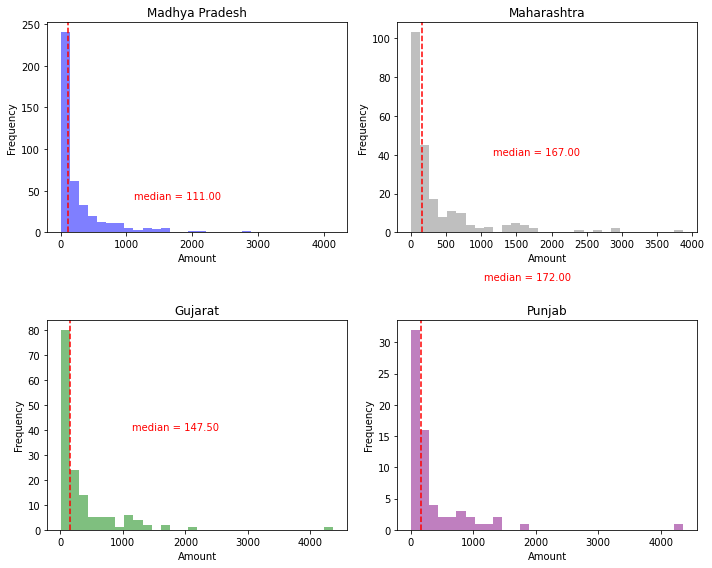

In [25]:
amount_madhya = order_details[order_details['State'] == 'Madhya Pradesh']['Amount']
amount_maharashtra = order_details[order_details['State'] == 'Maharashtra']['Amount']
amount_gujarat = order_details[order_details['State'] == 'Gujarat']['Amount']
amount_punjab = order_details[order_details['State'] == 'Punjab']['Amount']
num_bins = 30
fig, axes = plt.subplots(2, 2, figsize=(10, 8))


axes[0, 0].hist(amount_madhya, bins=num_bins, color='blue', alpha=0.5)
axes[0, 0].set_title('Madhya Pradesh')
axes[0, 0].set_xlabel('Amount')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(x=amount_madhya.median(), color='red', linestyle='--', label='Median')
axes[0, 0].annotate(f'median = {amount_madhya.median():.2f}', xy=(amount_madhya.median(), 0), xytext=(amount_madhya.median() + 1000, 40),
                    color='red', fontsize=10)

axes[0, 1].hist(amount_maharashtra, bins=num_bins, color='grey', alpha=0.5)
axes[0, 1].set_title('Maharashtra')
axes[0, 1].set_xlabel('Amount')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(x=amount_maharashtra.median(), color='red', linestyle='--', label='Median')
axes[0, 1].annotate(f'median = {amount_maharashtra.median():.2f}', xy=(amount_maharashtra.median(), 0), xytext=(amount_maharashtra.median() + 1000, 40),
                    color='red', fontsize=10)

axes[1, 0].hist(amount_gujarat, bins=num_bins, color='green', alpha=0.5)
axes[1, 0].set_title('Gujarat')
axes[1, 0].set_xlabel('Amount')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(x=amount_gujarat.median(), color='red', linestyle='--', label='Median')
axes[1, 0].annotate(f'median = {amount_gujarat.median():.2f}', xy=(amount_gujarat.median(), 0), xytext=(amount_gujarat.median() + 1000, 40),
                    color='red', fontsize=10)

axes[1, 1].hist(amount_punjab, bins=num_bins, color='purple', alpha=0.5)
axes[1, 1].set_title('Punjab')
axes[1, 1].set_xlabel('Amount')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(x=amount_punjab.median(), color='red', linestyle='--', label='Median')
axes[1, 1].annotate(f'median = {amount_punjab.median():.2f}', xy=(amount_punjab.median(), 0), xytext=(amount_punjab.median() + 1000, 40),
                    color='red', fontsize=10)

plt.tight_layout()
plt.show()

## Hypothesis Testing

### Profit yang dihasilkan perempuan lebih besar dari laki-laki

#### Hypothesis

- Null Hypothesis (H0): Tidak ada perbedaan profit yang didapatkan dari proses pembelian produk antara laki-laki dan perempuan
- Alternative Hypothesis (H1): Profit dari hasil proses pembelian produk oleh perempuan lebih tinggi daripada laki-laki

Type hypothesis: Right-tailed

Method testing: 
- option 1. parametrik independent t-test
- option 2. non parametrik mann-whitney U

Asumsi parametrik:
- Merupakan sample acak yang representatif dari populasi
- Data harus kontinu, baik berupa interval atau ratio
- Berdistribusi normal
- Homoskedastisitas

In [26]:
def plot_distribution(data1, data2, label_data1, label_data2, xlabel, ylabel, title):
    plt.figure(figsize=(8, 6))
    sns.histplot(data1, kde=True, color='blue', label=label_data1)
    sns.histplot(data2, kde=True, color='red', label=label_data2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

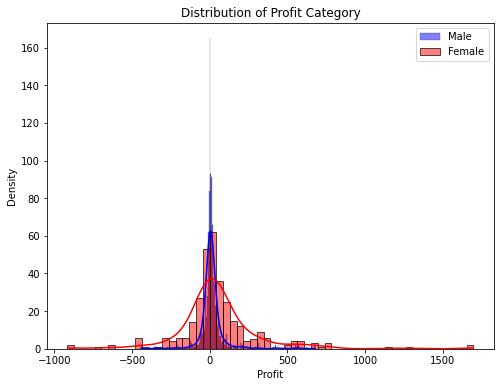

In [27]:
profit_male = order_details[order_details['Category'] == 'Male']['Profit']
profit_female = order_details[order_details['Category'] == 'Female']['Profit']

plot_distribution(profit_male,
                  profit_female,
                  'Male', 'Female',
                  'Profit', 'Density', 'Distribution of Profit Category')

In [28]:
profit_male.var() == profit_female.var()

False

In [29]:
from scipy.stats import levene
from scipy import stats

# uji Levene untuk mengecek homoskedastisitas
statistic, p_value = levene(profit_female, profit_male)

print(p_value)

2.2268563852105115e-41


p-value < 0.05 artinya data bersifat heteroskedastisitas. Hal ini juga ditunjukkan dengan output False ketika memeriksa kesamaan variansi antar 2 kelompok. Oleh sebab itu kita menggunakan uji non-parametrik Mann-Whitney

In [30]:
u_statistic, p_value = stats.mannwhitneyu(profit_female, profit_male, alternative='greater')

# Print the results
print("U statistic:", u_statistic)
print("P value:", p_value)

U statistic: 177469.5
P value: 0.004450274916362101


p-value < 0.05 yang berarti terdapat cukup bukti untuk kita menolak H0 atau dengan kata lain profit yang dihasilkan oleh perempuan selama proses transaksi produk lebih besar dibandingkan dengan yang dihasilkan oleh laki-laki

### Purchase value tahun 2023 lebih besar dibandingkan tahun 2024

#### Hypothesis

- Null Hypothesis (H0): Tidak ada perbedaan purchase tahun 2023 dengan tahun 2022
- Alternative Hypothesis (H1): Purchase value pada tahun 2023 lebih tinggi daripada tahun 2022

Type hypothesis: Right-tailed

Method testing: 
- option 1. parametrik independent t-test
- option 2. non parametrik mann-whitney U

Asumsi parametrik:
- Merupakan sample acak yang representatif dari populasi
- Data harus kontinu, baik berupa interval atau ratio
- Berdistribusi normal
- Homoskedastisitas

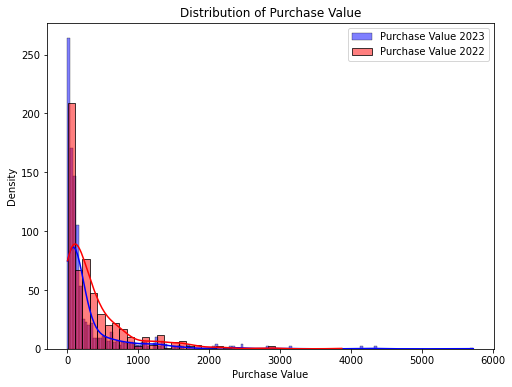

In [31]:
purchase_value_2023 = order_details[order_details['Year'] == '2023']['Amount']
purchase_value_2022 = order_details[order_details['Year'] == '2022']['Amount']

plot_distribution(purchase_value_2023,
                  purchase_value_2022,
                  'Purchase Value 2023', 'Purchase Value 2022',
                  'Purchase Value', 'Density', 'Distribution of Purchase Value')

In [32]:
purchase_value_2023.var() == purchase_value_2022.var()

False

In [33]:
# uji Levene untuk mengecek homoskedastisitas
statistic, p_value = levene(purchase_value_2023, purchase_value_2022)

print(p_value)

0.022048393735546953


p-value < 0.05 artinya data bersifat heteroskedastisitas. Hal ini juga ditunjukkan dengan output False ketika memeriksa kesamaan variansi antar 2 kelompok. Oleh sebab itu kita menggunakan uji non-parametrik Mann-Whitney

In [34]:
u_statistic, p_value = stats.mannwhitneyu(purchase_value_2023, purchase_value_2022, alternative='greater')

# Print the results
print("U statistic:", u_statistic)
print("P value:", p_value)

U statistic: 231303.0
P value: 0.999999999323936


p-value > 0.05 yang berarti tidak terdapat cukup bukti untuk kita menolak H0 atau dengan kata lain tidak ada perbedaan antara purchase value tahun 2023 dengan purchase value tahun 2022